In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('music_genre.csv')

# Display the first few rows of the dataset
print('First rows: \n', df.head())

# a. Attribute types and their semantics
attribute_types = df.dtypes
semantics = df.describe(include='all')
print('Attribute Types: \n',  attribute_types)
print('Semantics: \n', semantics)

First rows: 
    instance_id           artist_name            track_name  popularity  \
0      32894.0              Röyksopp  Röyksopp's Night Out        27.0   
1      46652.0  Thievery Corporation      The Shining Path        31.0   
2      30097.0        Dillon Francis             Hurricane        28.0   
3      62177.0              Dubloadz                 Nitro        34.0   
4      24907.0           What So Not      Divide & Conquer        32.0   

   acousticness  danceability  duration_ms  energy  instrumentalness key  \
0       0.00468         0.652         -1.0   0.941           0.79200  A#   
1       0.01270         0.622     218293.0   0.890           0.95000   D   
2       0.00306         0.620     215613.0   0.755           0.01180  G#   
3       0.02540         0.774     166875.0   0.700           0.00253  C#   
4       0.00465         0.638     222369.0   0.587           0.90900  F#   

   liveness  loudness   mode  speechiness               tempo obtained_date  \
0    

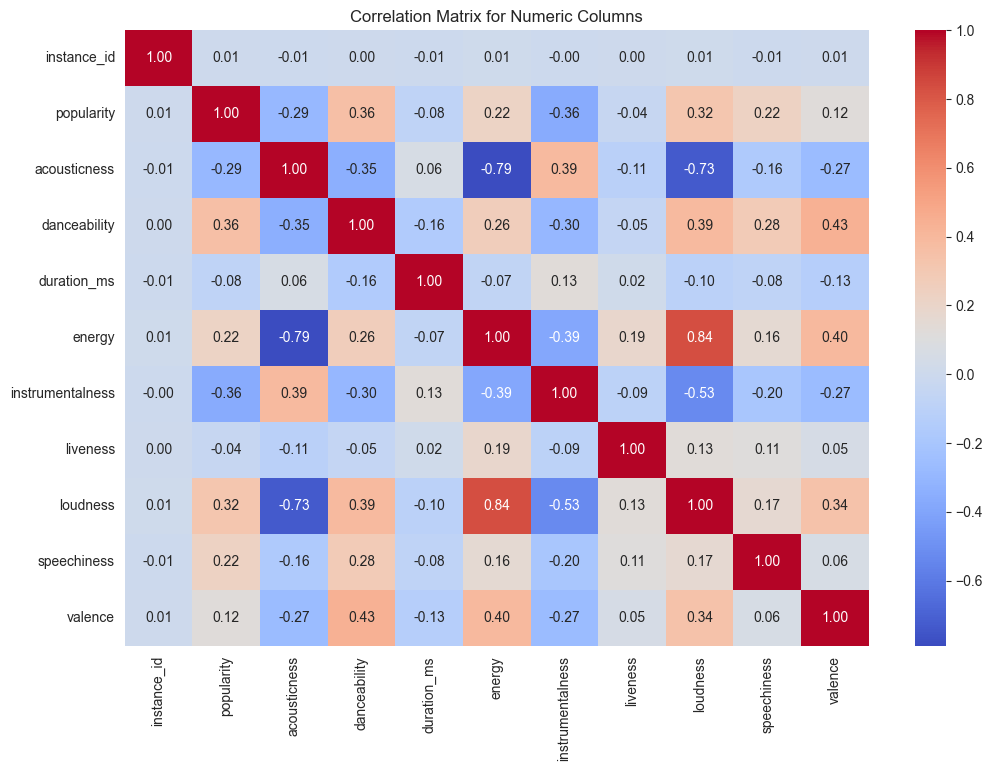

In [9]:
# b. Statistical properties and correlations
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Display correlation matrix for numeric columns
correlations_numeric = numeric_columns.corr()

# Visualize correlations using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlations_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numeric Columns')
plt.savefig('correlation_matrix.png')
plt.show()


Missing values: 
 instance_id         5
artist_name         5
track_name          5
popularity          5
acousticness        5
danceability        5
duration_ms         5
energy              5
instrumentalness    5
key                 5
liveness            5
loudness            5
mode                5
speechiness         5
tempo               5
obtained_date       5
valence             5
music_genre         5
dtype: int64


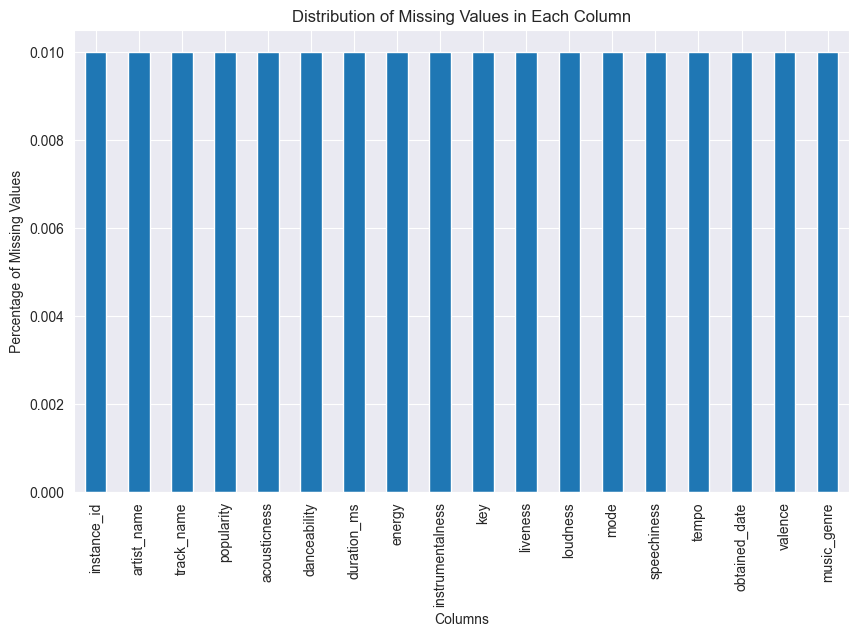

In [10]:
# c. Data quality aspects
missing_values = df.isnull().sum()
data_distribution = df['music_genre'].value_counts()
print( 'Missing values: \n', missing_values)
# Calculate the percentage of missing values for each column
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Plot the distribution of missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar')
plt.title('Distribution of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.savefig('distribution_missing_values.png')
plt.show()


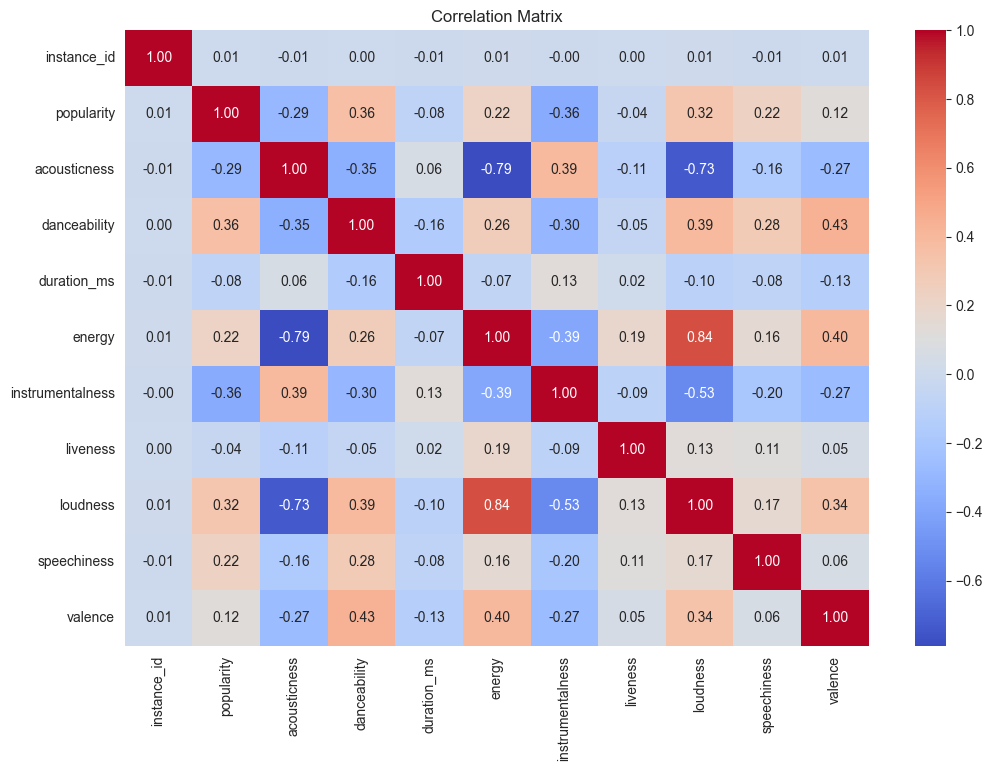

In [7]:
# d. Visual exploration of data properties and hypotheses
# Visualize correlations using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlations_numeric, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

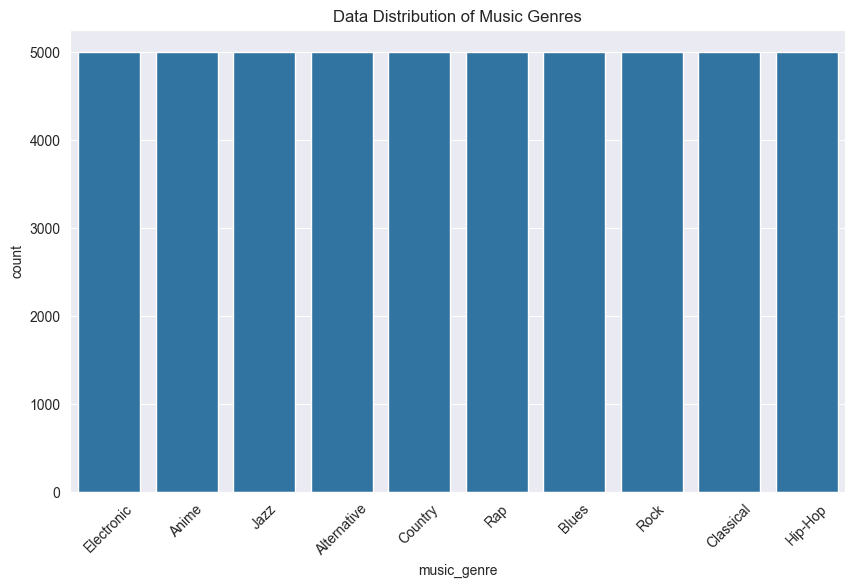

In [11]:
# Visualize data distribution of the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='music_genre', data=df)
plt.title('Data Distribution of Music Genres')
plt.xticks(rotation=45)
plt.savefig('data_distribution_music_genres.png')
plt.show()


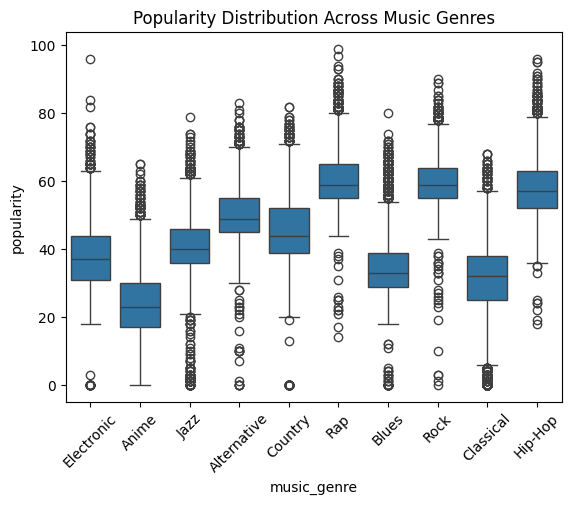

In [17]:
# e. Evaluate potentially ethically sensitive attributes and unbalanced distributions
# You may want to explore the distribution of other attributes based on the target variable, e.g., 'popularity' by 'music_genre'
sns.boxplot(x='music_genre', y='popularity', data=df)
plt.title('Popularity Distribution Across Music Genres')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# f. Potential risks and biases
# It's important to consult domain experts for understanding biases related to music genres.
# For example, consider biases related to cultural factors, language, or geographical regions.

# g. Actions likely required in data preparation
# Address missing values, handle outliers, and consider oversampling or undersampling for imbalanced classes.

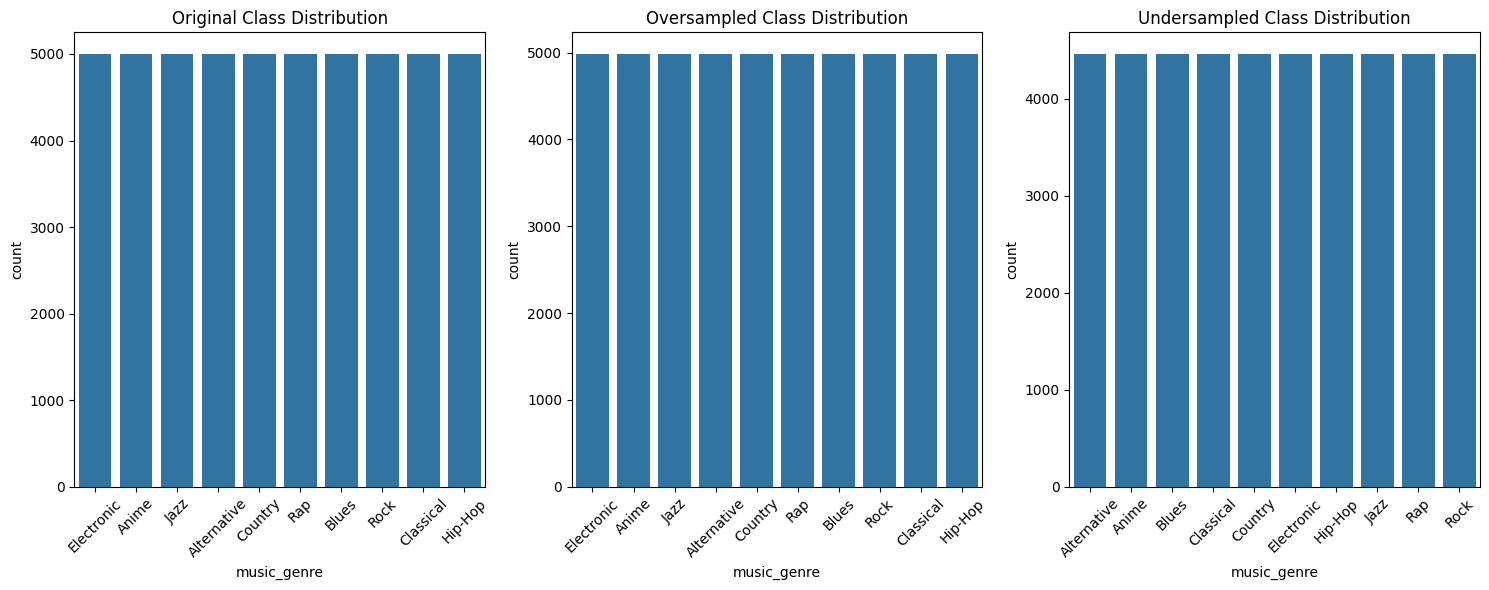

In [28]:
# Data Cleaning
# Drop instances with missing values
df_cleaned = df.dropna()

# Handle outliers (example: winsorizing)
q_low = df_cleaned['popularity'].quantile(0.01)
q_high = df_cleaned['popularity'].quantile(0.99)
df_cleaned = df_cleaned[(df_cleaned['popularity'] > q_low) & (df_cleaned['popularity'] < q_high)]

# Assuming you have performed oversampling and undersampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Assuming 'music_genre' is the target variable
X = df_cleaned.drop('music_genre', axis=1)
y = df_cleaned['music_genre']

# Oversampling
ros = RandomOverSampler()
X_oversampled, y_oversampled = ros.fit_resample(X, y)

# Undersampling
rus = RandomUnderSampler()
X_undersampled, y_undersampled = rus.fit_resample(X, y)

# Plot class distribution before and after oversampling and undersampling
plt.figure(figsize=(15, 6))

# Plot original class distribution
plt.subplot(1, 3, 1)
sns.countplot(x='music_genre', data=df)
plt.title('Original Class Distribution')
plt.xticks(rotation=45)

# Plot oversampled class distribution
plt.subplot(1, 3, 2)
sns.countplot(x=y_oversampled)
plt.title('Oversampled Class Distribution')
plt.xticks(rotation=45)

# Plot undersampled class distribution
plt.subplot(1, 3, 3)
sns.countplot(x=y_undersampled)
plt.title('Undersampled Class Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()